In [1]:
import json
import pandas as pd
import numpy as np
import prettytable as pt
import os
import warnings
warnings.filterwarnings("ignore")


###################################################################################################
                                                                                                  #
from rhoova.Client import *                                                                       #   
#Register and get api key from https://app.rhoova.com/ for ClientConfig("api key", "api secret")  #
config = ClientConfig("", "")                                                                     #
api = Api(config)                                                                                 # 
                                                                                                  #
###################################################################################################


directory = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + os.pardir)
datadirectory=directory+"/data/yielddata/yielddata.csv"

yielddata = pd.read_csv(datadirectory)
yielddata = yielddata.replace(np.nan, '', regex=True) 



In [2]:
swappositiondata = {}
swappositiondata["notional"]=10000000
swappositiondata["valuationDate"]="2021-06-02"
swappositiondata["settlementDate"]="2021-06-04"
swappositiondata["maturityDate"]="2026-06-04"
swappositiondata["startDate"]="2021-06-04"
swappositiondata["currency"]= "USD"
swappositiondata

{'notional': 10000000,
 'valuationDate': '2021-06-02',
 'settlementDate': '2021-06-04',
 'maturityDate': '2026-06-04',
 'startDate': '2021-06-04',
 'currency': 'USD'}

In [3]:
#swap fixedleg definition
fixedLeg={}
fixedLeg["payOrReceive"]="Receive"
fixedLeg["coupon"]= 0.0085
fixedLeg["frequency"]="Semiannual"
fixedLeg["dayCounter"]="Thirty360"
fixedLeg["calendar"]= "UnitedStates"
fixedLeg["businessDayConvention"]="ModifiedFollowing"
fixedLeg["maturityDateConvention"]="ModifiedFollowing"
fixedLeg["dateGeneration"]="Backward"
fixedLeg["endOfMonth"]=True
fixedLeg

{'payOrReceive': 'Receive',
 'coupon': 0.0085,
 'frequency': 'Semiannual',
 'dayCounter': 'Thirty360',
 'calendar': 'UnitedStates',
 'businessDayConvention': 'ModifiedFollowing',
 'maturityDateConvention': 'ModifiedFollowing',
 'dateGeneration': 'Backward',
 'endOfMonth': True}

In [4]:
floatingLeg={}
floatingLeg["frequency"]="Quarterly"
floatingLeg["spread"]=0.0
floatingLeg["index"]="TRLibor6M"
floatingLeg["dayCounter"]="Actual360"
floatingLeg["calendar"]="UnitedStates"
floatingLeg["businessDayConvention"]="ModifiedFollowing"
floatingLeg["maturityDateConvention"]="ModifiedFollowing"
floatingLeg["dateGeneration"]="Backward"
floatingLeg["endOfMonth"]=True
#floatingLeg["fixingDate"]=["2021-06-02"]
#floatingLeg["fixingRate"]=[0.0012850]
floatingLeg["fixingDate"]=[]
floatingLeg["fixingRate"]=[]
floatingLeg

{'frequency': 'Quarterly',
 'spread': 0.0,
 'index': 'TRLibor6M',
 'dayCounter': 'Actual360',
 'calendar': 'UnitedStates',
 'businessDayConvention': 'ModifiedFollowing',
 'maturityDateConvention': 'ModifiedFollowing',
 'dateGeneration': 'Backward',
 'endOfMonth': True,
 'fixingDate': [],
 'fixingRate': []}

In [5]:
instruments={}
depo={}
futures={}
irs={}

depo["businessDayConvention"]="ModifiedFollowing"     # if it is null, default value is used
depo["dayCounter"]="Actual360"                        # if it is null, default value is used

futures["businessDayConvention"]="ModifiedFollowing"  # if it is null, default value is used
futures["dayCounter"]= "Actual360"                    # if it is null, default value is used
futures["market"]="IMM"                               
futures["usedates"]=False                             

irs["businessDayConvention"]="ModifiedFollowing"      # if it is null, default value is used 
irs["dayCounter"]="Thirty360"                         # if it is null, default value is used 
irs["frequency"]="Semiannual"               

instruments["DEPO"]=depo
instruments["FUTURES"]=futures
instruments["IRS"]=irs

instruments

{'DEPO': {'businessDayConvention': 'ModifiedFollowing',
  'dayCounter': 'Actual360'},
 'FUTURES': {'businessDayConvention': 'ModifiedFollowing',
  'dayCounter': 'Actual360',
  'market': 'IMM',
  'usedates': False},
 'IRS': {'businessDayConvention': 'ModifiedFollowing',
  'dayCounter': 'Thirty360',
  'frequency': 'Semiannual'}}

In [6]:
discountCurve={}
discountCurve["settlementDays"]=2  # for calculation
discountCurve["intpMethod"]= "Linear"  # for calculation
discountCurve["currency"]="USD" # Used to filter yielddata by currency
discountCurve["calendar"]="UnitedStates" # for calculation
discountCurve["dayCounter"]="Actual360"  # for calculation
discountCurve["period"]="3M"  # Used to filter yielddata by period
discountCurve["instruments"]=instruments # Select depo,futures and irs data to calculate 
discountCurve

{'settlementDays': 2,
 'intpMethod': 'Linear',
 'currency': 'USD',
 'calendar': 'UnitedStates',
 'dayCounter': 'Actual360',
 'period': '3M',
 'instruments': {'DEPO': {'businessDayConvention': 'ModifiedFollowing',
   'dayCounter': 'Actual360'},
  'FUTURES': {'businessDayConvention': 'ModifiedFollowing',
   'dayCounter': 'Actual360',
   'market': 'IMM',
   'usedates': False},
  'IRS': {'businessDayConvention': 'ModifiedFollowing',
   'dayCounter': 'Thirty360',
   'frequency': 'Semiannual'}}}

In [7]:
# Different forecastcurve can be defined. If it is not defined dicountCurve is used for calculation
floatingLegForecastCurve= {}
floatingLegForecastCurve["settlementDays"]=2  # for calculation
floatingLegForecastCurve["intpMethod"]= "Linear"  # for calculation
floatingLegForecastCurve["currency"]="USD" # Used to filter yielddata by currency
floatingLegForecastCurve["calendar"]="UnitedStates" # for calculation
floatingLegForecastCurve["dayCounter"]="Actual360"  # for calculation
floatingLegForecastCurve["period"]="3M"  # Used to filter yielddata by period
floatingLegForecastCurve["instruments"]=instruments # Select depo,futures and irs data to calculate 
floatingLegForecastCurve

{'settlementDays': 2,
 'intpMethod': 'Linear',
 'currency': 'USD',
 'calendar': 'UnitedStates',
 'dayCounter': 'Actual360',
 'period': '3M',
 'instruments': {'DEPO': {'businessDayConvention': 'ModifiedFollowing',
   'dayCounter': 'Actual360'},
  'FUTURES': {'businessDayConvention': 'ModifiedFollowing',
   'dayCounter': 'Actual360',
   'market': 'IMM',
   'usedates': False},
  'IRS': {'businessDayConvention': 'ModifiedFollowing',
   'dayCounter': 'Thirty360',
   'frequency': 'Semiannual'}}}

In [8]:
yieldData= yielddata.to_dict('r')

swappositiondata['fixedLeg']=fixedLeg
swappositiondata['floatingLeg']=floatingLeg
swappositiondata['discountCurve']=discountCurve
swappositiondata['floatingLegForecastCurve']=floatingLegForecastCurve
swappositiondata['yieldData']=yieldData

try:
    data = api.createTask(CalculationType.INTEREST_RATES_SWAP, swappositiondata,True)
    result=json.loads(data["result"])
except RhoovaError as e:
    e.printPretty()

In [9]:
cashflow=pd.DataFrame(result.get('data'))

In [10]:
npvTable = pt.PrettyTable(['Parameters', 'Value'])
npvTable.add_row(['PV', result.get('pv')])
npvTable.add_row(['Fixed Leg PV', result.get('fixedLegPv')])
npvTable.add_row(['Float Leg PV', result.get('floatingLegPv')])
npvTable.add_row(['PV01', result.get('PV01')])
npvTable.add_row(['DV01', result.get('DV01')])
npvTable.add_row(['Fair Rate', 100*result.get('fairRate')])
npvTable.add_row(['Fair Spread', 100*result.get('fairSpread')])
npvTable.add_row(['Implied Quote', 100*result.get('impliedQuote')])
npvTable.align = 'r'
npvTable.float_format = '.4'
print(npvTable)



+---------------+--------------+
|    Parameters |        Value |
+---------------+--------------+
|            PV |  -13048.6425 |
|  Fixed Leg PV |  418541.3646 |
|  Float Leg PV | -431590.0071 |
|          PV01 |    4924.0161 |
|          DV01 |   -5000.8815 |
|     Fair Rate |       0.8765 |
|   Fair Spread |      -0.0261 |
| Implied Quote |       0.8765 |
+---------------+--------------+


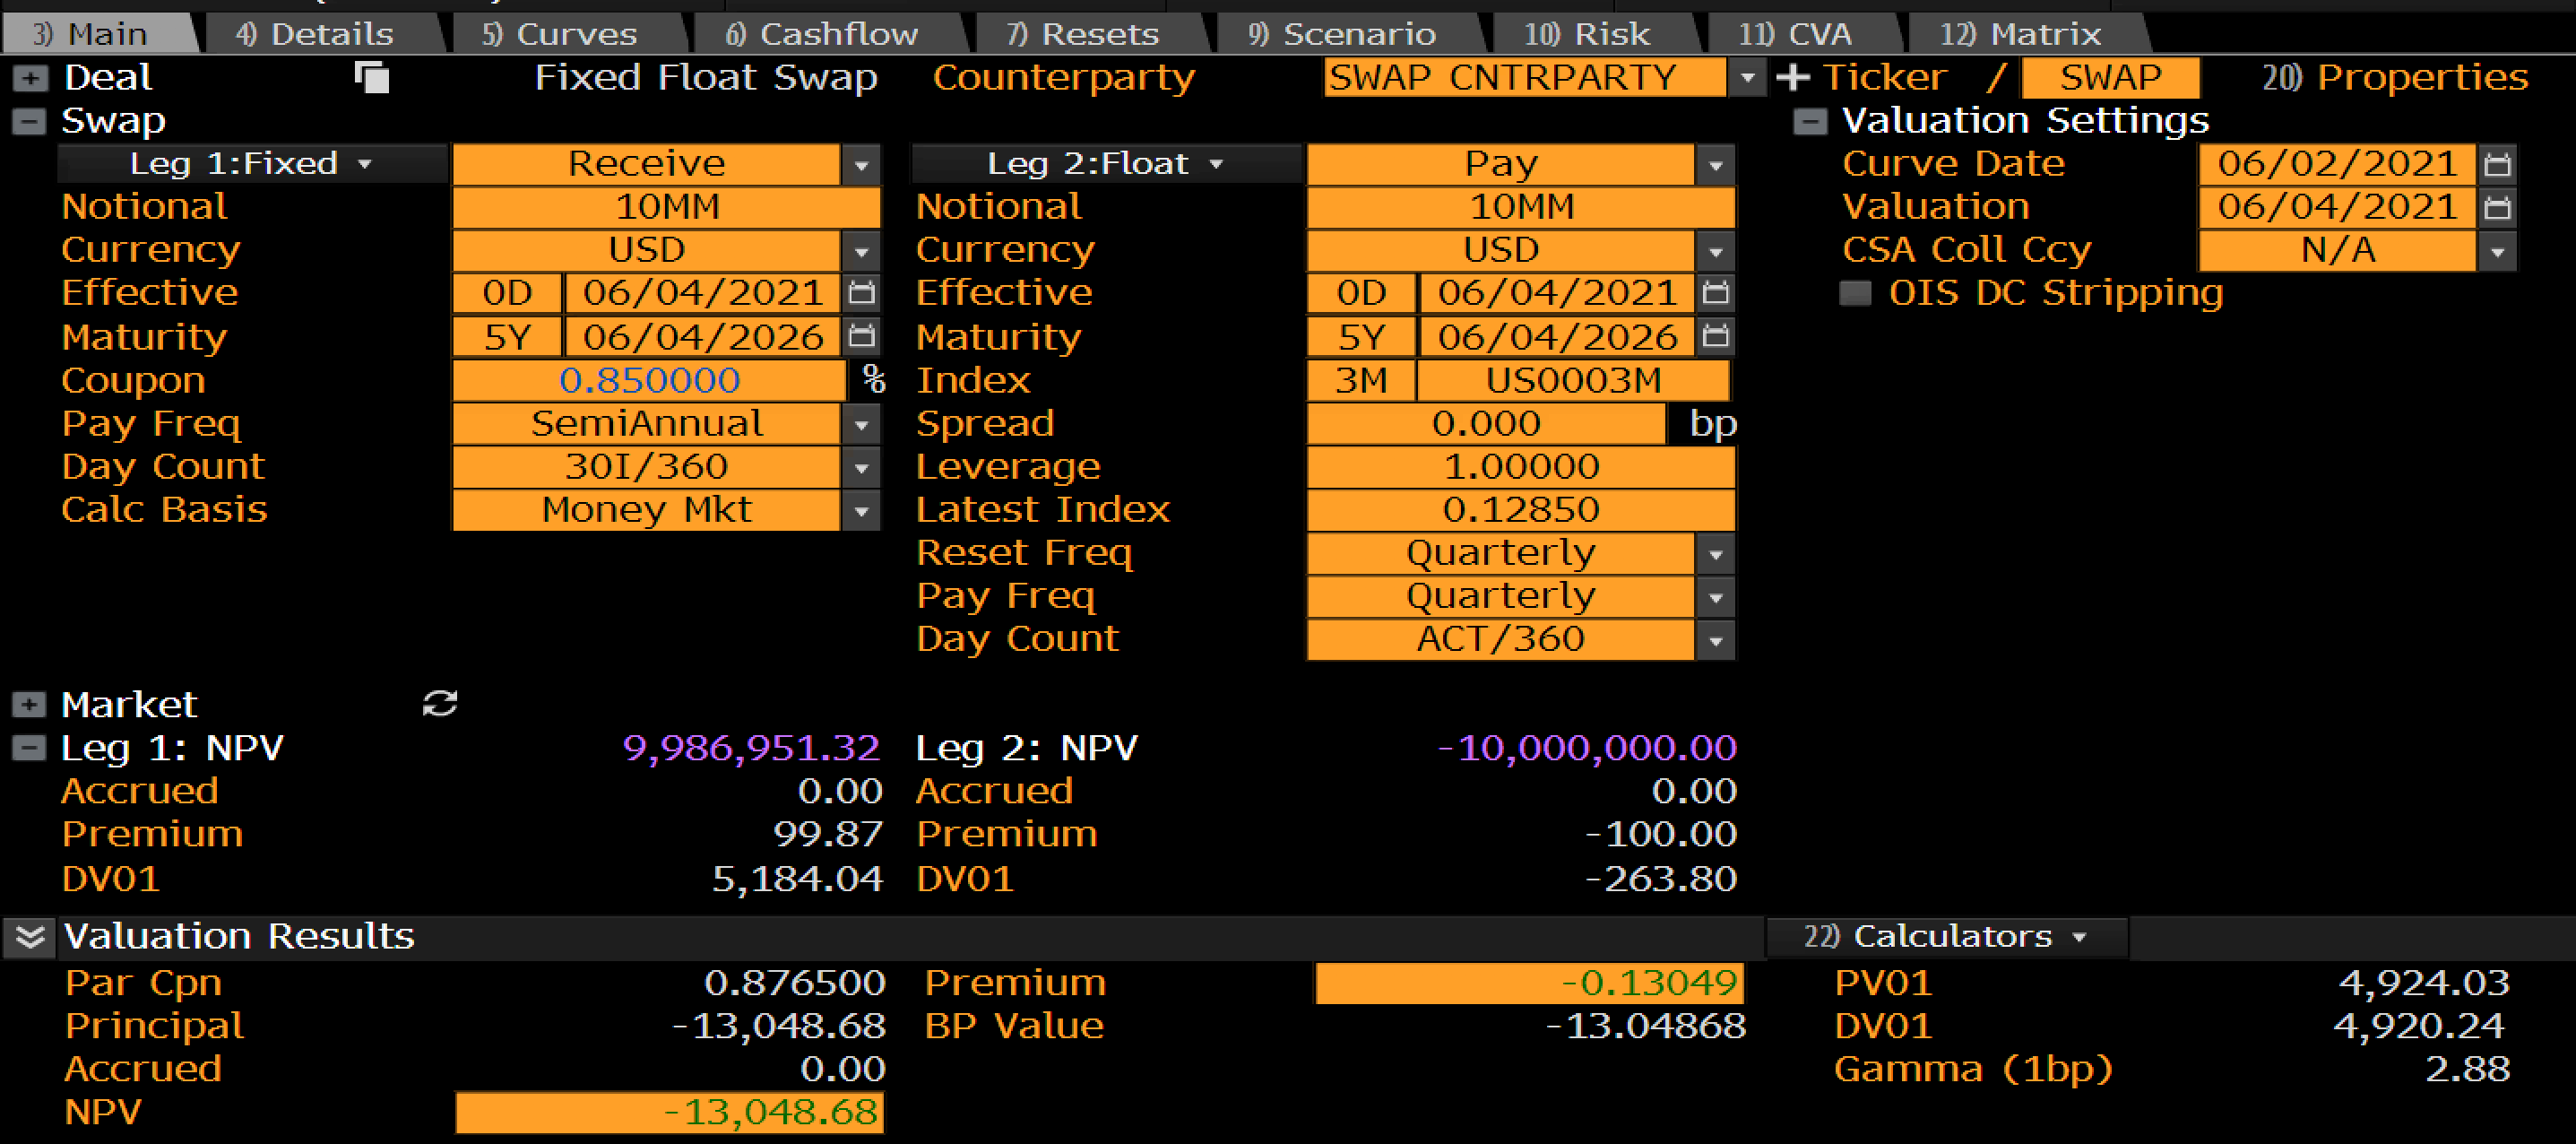

In [11]:
fixedLeg["coupon"]= 0.0085+1/10000

try:
    data = api.createTaskAndWaitForResult(CalculationType.INTEREST_RATES_SWAP, swappositiondata)
    pv01result=json.loads(data["result"])
except RhoovaError as e:
    e.printPretty()

In [12]:
npvTable = pt.PrettyTable(['Parameters', 'Value'])
npvTable.add_row(['PV', pv01result.get('pv')])
npvTable.add_row(['Fixed Leg PV', pv01result.get('fixedLegPv')])
npvTable.add_row(['Float Leg PV', pv01result.get('floatingLegPv')])
npvTable.add_row(['PV01', pv01result.get('PV01')])
npvTable.add_row(['DV01', pv01result.get('DV01')])
npvTable.add_row(['Fair Rate', 100*pv01result.get('fairRate')])
npvTable.add_row(['Fair Spread', 100*pv01result.get('fairSpread')])
npvTable.add_row(['Implied Quote', 100*pv01result.get('impliedQuote')])
npvTable.align = 'r'
npvTable.float_format = '.4'
print(npvTable)



+---------------+--------------+
|    Parameters |        Value |
+---------------+--------------+
|            PV |   -8124.6265 |
|  Fixed Leg PV |  423465.3806 |
|  Float Leg PV | -431590.0071 |
|          PV01 |    4924.0161 |
|          DV01 |   -5000.8815 |
|     Fair Rate |       0.8765 |
|   Fair Spread |      -0.0162 |
| Implied Quote |       0.8765 |
+---------------+--------------+


In [13]:
PV01=pv01result.get('pv')-result.get('pv')

In [14]:
npvTable = pt.PrettyTable(['Parameters', 'Value'])
npvTable.add_row(['PV01', PV01])
npvTable.align = 'r'
npvTable.float_format = '.4'
print(npvTable)

+------------+-----------+
| Parameters |     Value |
+------------+-----------+
|       PV01 | 4924.0161 |
+------------+-----------+


In [15]:
fixedLeg["coupon"]= 0.0085
discountCurve['applyShock']={
          "method": "parallel",
          "shockValues" : [
            {
              "tenor" : "all",
              "shockValue" : 1.0
            }
            ]}
floatingLegForecastCurve['applyShock']={
          "method": "parallel",
          "shockValues" : [
            {
              "tenor" : "all",
              "shockValue" : 1.0
            }
            ]}

swappositiondata['discountCurve']=discountCurve
swappositiondata['floatingLegForecastCurve']=floatingLegForecastCurve


In [16]:
try:
    data = api.createTaskAndWaitForResult(CalculationType.INTEREST_RATES_SWAP, swappositiondata)
    dv01result=json.loads(data["result"])
except RhoovaError as e:
    e.printPretty()

In [17]:
npvTable = pt.PrettyTable(['Parameters', 'Value'])
npvTable.add_row(['PV', dv01result.get('pv')])
npvTable.add_row(['Fixed Leg PV', dv01result.get('fixedLegPv')])
npvTable.add_row(['Float Leg PV', dv01result.get('floatingLegPv')])
npvTable.add_row(['PV01', dv01result.get('PV01')])
npvTable.add_row(['DV01', dv01result.get('DV01')])
npvTable.add_row(['Fair Rate', 100*dv01result.get('fairRate')])
npvTable.add_row(['Fair Spread', 100*dv01result.get('fairSpread')])
npvTable.add_row(['Implied Quote', 100*dv01result.get('impliedQuote')])
npvTable.align = 'r'
npvTable.float_format = '.4'
print(npvTable)



+---------------+--------------+
|    Parameters |        Value |
+---------------+--------------+
|            PV |  -18016.6486 |
|  Fixed Leg PV |  418425.4380 |
|  Float Leg PV | -436442.0866 |
|          PV01 |    4922.6522 |
|          DV01 |   -4999.5595 |
|     Fair Rate |       0.8866 |
|   Fair Spread |      -0.0360 |
| Implied Quote |       0.8866 |
+---------------+--------------+


In [18]:
DVO1=dv01result.get('pv')-result.get('pv')

In [19]:
npvTable = pt.PrettyTable(['Parameters', 'Value'])
npvTable.add_row(['DV01', DVO1])
npvTable.align = 'r'
npvTable.float_format = '.4'
print(npvTable)


+------------+------------+
| Parameters |      Value |
+------------+------------+
|       DV01 | -4968.0061 |
+------------+------------+
